# Hierarchical Clustering Project

# Importing Libraries

In [ ]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import scipy
from scipy.cluster.hierarchy import dendrogram,linkage, fcluster, cophenet
from scipy.spatial.distance import pdist
from pylab import rcParams
from sklearn.cluster import AgglomerativeClustering
import sklearn.metrics as sm

# Loading Data

In [3]:
data = pd.read_csv('employee-compensation.csv')

In [5]:
data.shape

(683277, 22)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683277 entries, 0 to 683276
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Organization Group Code  683277 non-null  int64  
 1   Job Family Code          683277 non-null  object 
 2   Job Code                 683277 non-null  object 
 3   Year Type                683277 non-null  object 
 4   Year                     683277 non-null  int64  
 5   Organization Group       683277 non-null  object 
 6   Department Code          683275 non-null  object 
 7   Department               683275 non-null  object 
 8   Union Code               682926 non-null  float64
 9   Union                    682926 non-null  object 
 10  Job Family               683277 non-null  object 
 11  Job                      683272 non-null  object 
 12  Employee Identifier      683277 non-null  int64  
 13  Salaries                 683277 non-null  float64
 14  Over

# Truncating Data

In [8]:
dataset_new = data.iloc[0:20000, :]
dataset_new.head()

,Organization Group Code,Job Family Code,Job Code,Year Type,Year,Organization Group,Department Code,Department,Union Code,Union,...,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation
0,1,1000,1021,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,37730,57534.65,0.0,0.00,57534.65,11253.16,11961.34,4532.63,27747.13,85281.78
1,1,1000,1023,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,26574,57678.50,0.0,0.00,57678.50,10284.88,7176.80,4755.14,22216.82,79895.32
2,1,1000,1031,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,8148,63532.93,0.0,0.00,63532.93,12495.83,12918.24,4702.71,30116.78,93649.71
3,1,1000,1054,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,27436,101274.51,0.0,-7058.59,94215.92,19644.45,12918.24,7458.76,40021.45,134237.37
4,1,1000,1062,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,37730,5084.00,0.0,0.00,5084.00,1083.90,956.91,387.50,2428.31,7512.31


In [22]:
X = dataset_new.select_dtypes(include='float')

In [23]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Union Code          20000 non-null  float64
 1   Salaries            20000 non-null  float64
 2   Overtime            20000 non-null  float64
 3   Other Salaries      20000 non-null  float64
 4   Total Salary        20000 non-null  float64
 5   Retirement          20000 non-null  float64
 6   Health and Dental   20000 non-null  float64
 7   Other Benefits      20000 non-null  float64
 8   Total Benefits      20000 non-null  float64
 9   Total Compensation  20000 non-null  float64
dtypes: float64(10)
memory usage: 1.5 MB


# Using SINGLE Method

Z-Shape: (19999, 4)


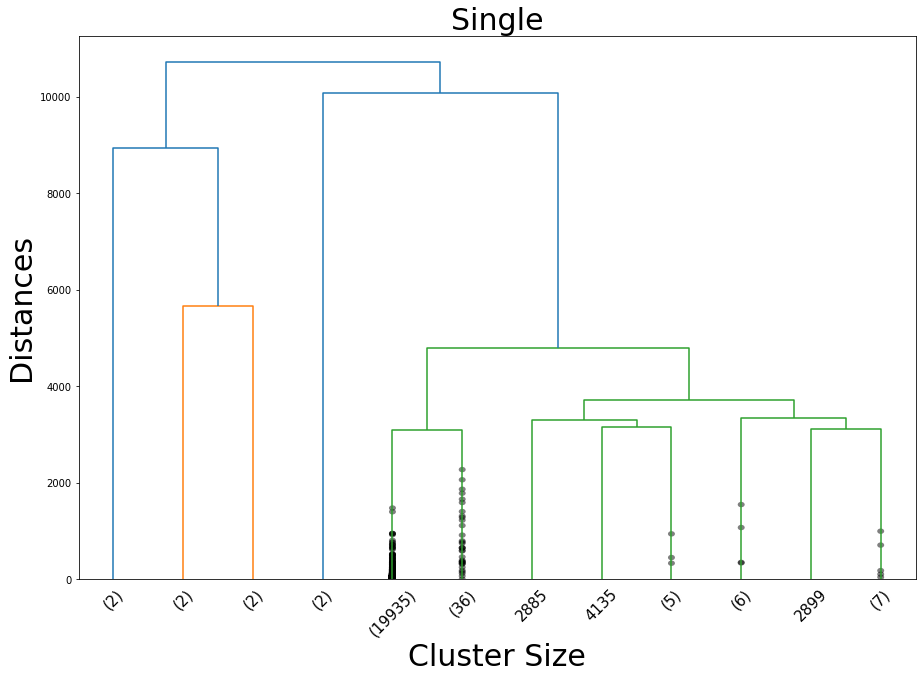

In [26]:
plt.figure(figsize=(15,10))
Z=linkage(X.drop(['Union Code', 'Salaries', 'Overtime', 'Other Salaries', 'Total Salary',
       'Retirement', 'Health and Dental', 'Other Benefits', 'Total Benefits'],axis=1),method='single')
print("Z-Shape:",Z.shape)
plt.title("Single",size=30)
dendrogram(Z,orientation='top',truncate_mode='lastp',p=12,get_leaves=True,leaf_rotation=45,leaf_font_size=15,show_contracted=True,)
plt.xlabel("Cluster Size",fontsize=30)
plt.ylabel("Distances",fontsize=30)
plt.show()

# Using COMPLETE Method

Z-Shape: (19999, 4)


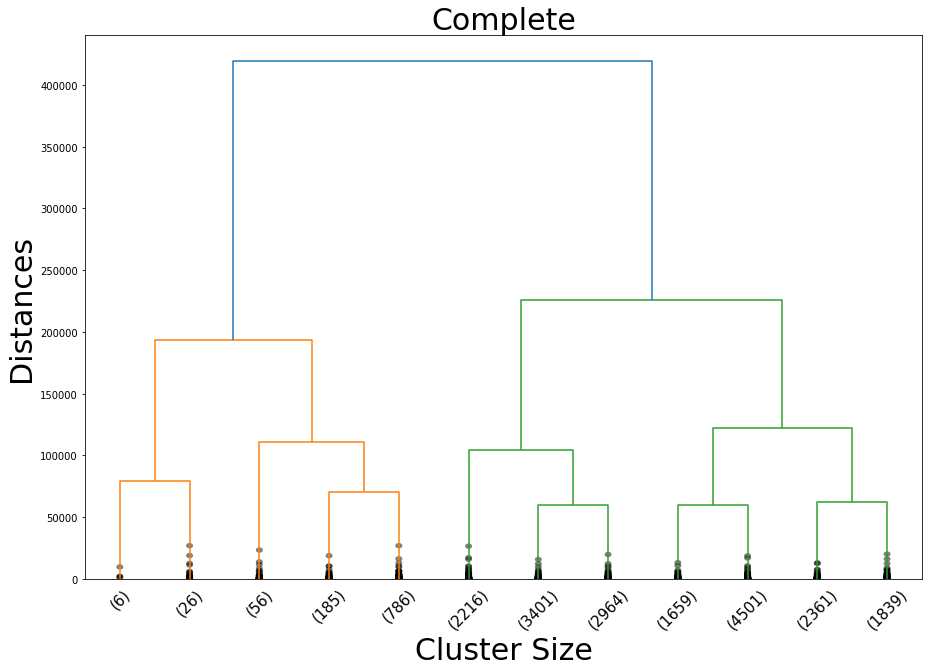

In [27]:
plt.figure(figsize=(15,10))
Z=linkage(X.drop(['Union Code', 'Salaries', 'Overtime', 'Other Salaries', 'Total Salary',
       'Retirement', 'Health and Dental', 'Other Benefits', 'Total Benefits'],axis=1),method='complete')
print("Z-Shape:",Z.shape)
plt.title("Complete",size=30)
dendrogram(Z,orientation='top',truncate_mode='lastp',p=12,get_leaves=True,leaf_rotation=45,leaf_font_size=15,show_contracted=True,)
plt.xlabel("Cluster Size",fontsize=30)
plt.ylabel("Distances",fontsize=30)
plt.show()

# Using WEIGHTED Method

Z-Shape: (19999, 4)


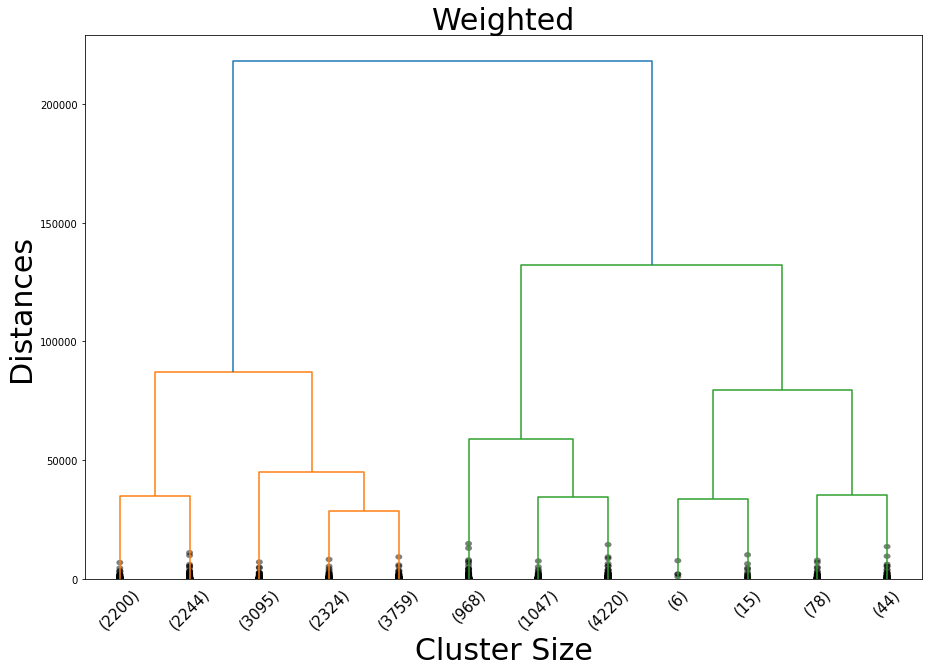

In [28]:
plt.figure(figsize=(15,10))
Z=linkage(X.drop(['Union Code', 'Salaries', 'Overtime', 'Other Salaries', 'Total Salary',
       'Retirement', 'Health and Dental', 'Other Benefits', 'Total Benefits'],axis=1),method='weighted')
print("Z-Shape:",Z.shape)
plt.title("Weighted",size=30)
dendrogram(Z,orientation='top',truncate_mode='lastp',p=12,get_leaves=True,leaf_rotation=45,leaf_font_size=15,show_contracted=True,)
plt.xlabel("Cluster Size",fontsize=30)
plt.ylabel("Distances",fontsize=30)
plt.show()

# Using WARD Method

Z-Shape: (19999, 4)


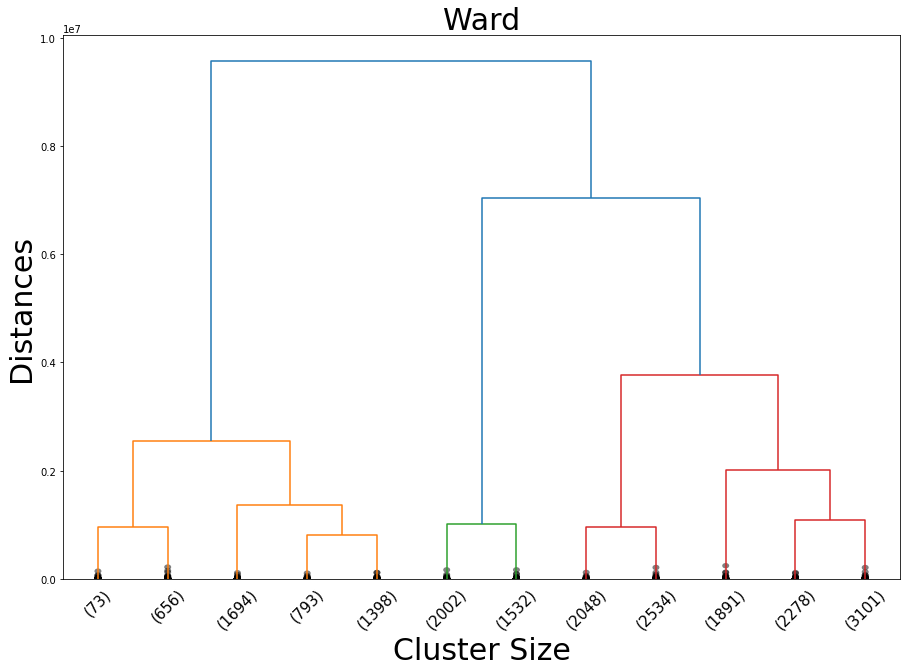

In [31]:
plt.figure(figsize=(15,10))
Z=linkage(X.drop(['Union Code', 'Salaries', 'Overtime', 'Other Salaries', 'Total Salary',
       'Retirement', 'Health and Dental', 'Other Benefits', 'Total Benefits'],axis=1),method='ward')
print("Z-Shape:",Z.shape)
plt.title("Ward",size=30)
dendrogram(Z,orientation='top',truncate_mode='lastp',p=12,get_leaves=True,leaf_rotation=45,leaf_font_size=15,show_contracted=True,)
plt.xlabel("Cluster Size",fontsize=30)
plt.ylabel("Distances",fontsize=30)
plt.show()

# Using CENTROID Method

Z-Shape: (19999, 4)


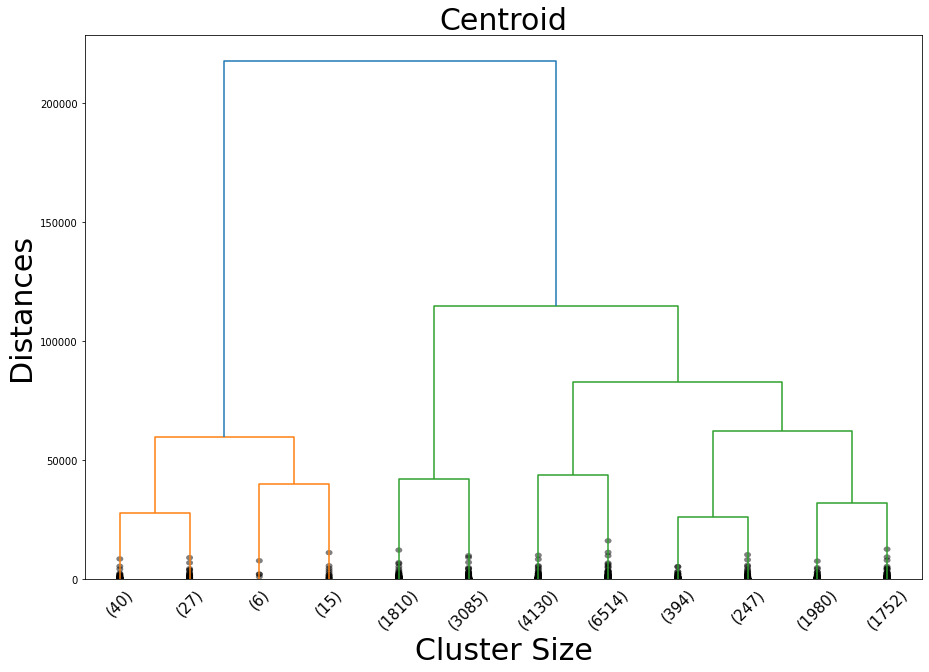

In [32]:
plt.figure(figsize=(15,10))
Z=linkage(X.drop(['Union Code', 'Salaries', 'Overtime', 'Other Salaries', 'Total Salary',
       'Retirement', 'Health and Dental', 'Other Benefits', 'Total Benefits'],axis=1),method='centroid')
print("Z-Shape:",Z.shape)
plt.title("Centroid",size=30)
dendrogram(Z,orientation='top',truncate_mode='lastp',p=12,get_leaves=True,leaf_rotation=45,leaf_font_size=15,show_contracted=True,)
plt.xlabel("Cluster Size",fontsize=30)
plt.ylabel("Distances",fontsize=30)
plt.show()